# PROBLEM STATEMENT

Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.We will try to build a model using data from loan applications.Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.

In [69]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

Loan_ID--------------> Unique Loan ID.
Gender --------------> Male/ Female
Married --------------> Applicant married (Y/N)
Dependents ------------> Number of dependents
Education -------------> Applicant Education (Graduate/ Under Graduate)
Self_Employed ---------> Self-employed (Y/N)
ApplicantIncome -------> Applicant income
CoapplicantIncome -----> Coapplicant income
LoanAmount -----------> Loan amount in thousands
Loan_Amount_Term ------> Term of a loan in months
Credit_History --------> Credit history meets guidelines
Property_Area ---------> Urban/ Semi-Urban/ Rural
Loan_Status -----------> Loan approved (Y/N)

In [70]:
loan_data=pd.read_csv("D:\edupdf\loan-data.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Exploratory Data Analysis

In [72]:
# Size Of Data Set
loan_data.shape

(614, 13)

In [73]:
# Columns Names
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
# Columns Types
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [75]:
#Info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
# Duplicated data
loan_data[loan_data.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


describe()

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [77]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Missing Values

In [78]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(loan_data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [80]:
df_loan=loan_data.copy()
df_loan=df_loan.dropna()
df_loan.drop(['Loan_ID'],inplace=True,axis=1)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [81]:
# Unique Value
{column: list(df_loan[column].unique()) for column in df_loan.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Married': ['Yes', 'No'],
 'Dependents': ['1', '0', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes'],
 'Property_Area': ['Rural', 'Urban', 'Semiurban'],
 'Loan_Status': ['N', 'Y']}

In [82]:
#gender distribution


df_gender=df_loan['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})


fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [83]:
df_gender=df_loan['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})

fig = go.Figure(go.Bar(
    x=df_gender['Gender'],y=df_gender['count'],
    marker={'color': df_gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

In [84]:
#marriage distribution


df_Married=df_loan['Married'].value_counts().to_frame().reset_index().rename(columns={'index':'Married','Married':'count'})


fig = go.Figure([go.Pie(labels=df_Married['Married'], values=df_Married['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Married Count",title_x=0.5)
fig.show()

In [85]:
#distribution of marriage by gender


df_M_and_G=df_loan.groupby(by =['Gender','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'Count'})
df_M_and_G

fig = px.bar(df_M_and_G, x="Married", y="Count",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Married Count With Gender',title_x=0.5,
                 )
fig.show()

In [86]:
#Education distribution


df_Education=df_loan['Education'].value_counts().to_frame().reset_index().rename(columns={'index':'Education','Education':'count'})


fig = go.Figure([go.Pie(labels=df_Education['Education'], values=df_Education['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Education Count",title_x=0.5)
fig.show()

In [87]:
#distribution of education by gender,marriage


df_M_and_G_and_E=df_loan.groupby(by =['Gender','Education','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Married", barmode="group",
             facet_col="Education"
             )
fig.update_layout(title_text='Education Count With Gender,Married',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

In [88]:
#Self Employed distribution



df_Self_Employed=df_loan['Self_Employed'].value_counts().to_frame().reset_index().rename(columns={'index':'Self_Employed','Self_Employed':'count'})

fig = go.Figure([go.Pie(labels=df_Self_Employed['Self_Employed'], values=df_Self_Employed['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Self Employed Count",title_x=0.5)
fig.show()

In [89]:
#distribution of education by gender


df_M_and_G_and_E=df_loan.groupby(by =['Gender','Self_Employed'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Self_Employed':'Self_Employed','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Self_Employed", barmode="group",
             
             )
fig.update_layout(title_text='Self Employed Count With Gender',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

In [90]:
#applicant income distribution


df_loan.ApplicantIncome.describe()

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [91]:
fig = go.Figure(data=[go.Histogram(x=df_loan['ApplicantIncome'],  # To get Horizontal plot ,change axis - 
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, #start range of bin
                      end=25000,  #end range of bin
                      size=1000   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Applicant Income",xaxis_title="Applicant Income",yaxis_title="Counts",title_x=0.5)
fig.show()


In [92]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_loan['ApplicantIncome'],
    marker_color='royalblue',
    boxmean=True # represent mean
))
fig.update_layout(title_text='Applicant Income',yaxis_title="Count",title_x=0.5)
fig.show()

In [93]:
fig = px.box(df_loan, x="Self_Employed", y="ApplicantIncome")
fig.update_layout(title_text='Applicant Income With Self Employed',xaxis_title="Self Employed",yaxis_title="Applicant Income",title_x=0.5)
fig.show()

In [94]:
# Multiple Bullet

min_income=df_loan.ApplicantIncome.min()

max_income=df_loan.ApplicantIncome.max()

mean_income=df_loan.ApplicantIncome.mean()


fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  min_income,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.5]},
    title = {'text': "Min Income",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 200]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = max_income,
    domain = {'x': [0.25, 1], 'y': [0.6, 0.7]},
    title = {'text': "Max Income",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,100500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = mean_income,
    domain = {'x': [0.25, 1], 'y': [0.8, 0.9]},
    title = {'text' :"Mean Income",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "darkblue"}}
))

fig.update_layout(title="Applicant Income Statistics ",title_x=0.5)
fig.show()

In [95]:

SE_Y_income=df_loan[df_loan["Self_Employed"]=="Yes"]
SE_N_income=df_loan[df_loan["Self_Employed"]=="No"]


minY_income=SE_Y_income.ApplicantIncome.min()

maxY_income=SE_Y_income.ApplicantIncome.max()

meanY_income=SE_Y_income.ApplicantIncome.mean()

minN_income=SE_N_income.ApplicantIncome.min()

maxN_income=SE_N_income.ApplicantIncome.max()

meanN_income=SE_N_income.ApplicantIncome.mean()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  minY_income,
    domain = {'x': [0.25, 1], 'y': [0.05, 0.15]},
    title = {'text': "Self Employed Min Income ",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 1500]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxY_income,
    domain = {'x': [0.25, 1], 'y': [0.22, 0.32]},
    title = {'text': "Self Employed Max Income",'font':{'color': 'black','size':12}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,42500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanY_income,
    domain = {'x': [0.25, 1], 'y': [0.39, 0.49]},
    title = {'text' :"Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,8000]},
        'bar': {'color': "darkblue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = minN_income,
    domain = {'x': [0.25, 1], 'y': [0.55, 0.65]},
    title = {'text' :"Not Self Employed Min Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,200]},
        'bar': {'color': "darkcyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxN_income,
    domain = {'x': [0.25, 1], 'y': [0.72,0.82]},
    title = {'text' :"Not Self Employed Max Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,90000]},
        'bar': {'color': "red"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanN_income,
    domain = {'x': [0.25, 1], 'y': [0.88,0.98]},
    title = {'text' :"Not Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Self Employed And Not Self Employed Applicant Income Statistics ",title_x=0.5)
fig.show()

In [96]:
# location of the houses


df_Property_Area=df_loan['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})

fig = go.Figure(data=[go.Scatter(
    x=df_Property_Area['Property_Area'], y=df_Property_Area['count'],
    mode='markers',
    marker=dict(
        color=df_Property_Area['count'],
        size=df_Property_Area['count']*0.3, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Property Area',xaxis_title="Property Area ",yaxis_title="Number Of Property ",title_x=0.5)
fig.show()

In [97]:
df_Property_Area=df_loan['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})

colors=['cyan','darkblue',"darkcyan"]

fig = go.Figure([go.Pie(labels=df_Property_Area['Property_Area'], values=df_Property_Area['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Property Area Count",title_x=0.5)
fig.show()

In [98]:
df_Property_Area=df_loan['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})


fig = go.Figure(go.Bar(
    x=df_Property_Area['Property_Area'],y=df_Property_Area['count'],
    marker={'color': df_Property_Area['count'], 
    'colorscale': 'Viridis'},  
    text=df_Property_Area['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Property Area Count',xaxis_title="Property Area",yaxis_title="Number Of Property ",title_x=0.5)
fig.show()

In [99]:
df_PA_mean=df_loan.groupby(by =['Property_Area'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','ApplicantIncome':'mean'})
df_PA_min=df_loan.groupby(by =['Property_Area'])['ApplicantIncome'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','ApplicantIncome':'min'})
df_PA_max=df_loan.groupby(by =['Property_Area'])['ApplicantIncome'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','ApplicantIncome':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Applicant Income",
                                   "Min Applicant Income",
                                   "Max  Applicant Income"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Applicant Income",title_x=0.5)
fig.show()

In [100]:
df_PA=df_loan.groupby(by =['Property_Area'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','ApplicantIncome':'mean'})

fig = go.Figure(go.Bar(
    x=df_PA['Property_Area'],y=df_PA['mean'],
    marker={'color': df_PA['mean'], 
    'colorscale': 'twilight'},  
    text=df_PA['mean'],
    textposition = "outside",
))
fig.update_layout(title_text='Property Area With Applicant Mean Income',xaxis_title="Property Area",yaxis_title="Applicant Income",title_x=0.5)
fig.show()

In [101]:
df_PA_mean=df_loan.groupby(by =['Property_Area'])['LoanAmount'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','LoanAmount':'mean'})
df_PA_min=df_loan.groupby(by =['Property_Area'])['LoanAmount'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','LoanAmount':'min'})
df_PA_max=df_loan.groupby(by =['Property_Area'])['LoanAmount'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','LoanAmount':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount",
                                   "Min Loan Amount",
                                   "Max  Loan Amount"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'curl'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'curl'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'curl'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Loan Amount",title_x=0.5)
fig.show()

In [102]:
fig = px.scatter(df_loan, x='ApplicantIncome', y='LoanAmount',color="Property_Area")
fig.update_layout(title='Applicant Income Vs Loan Amount With Property Area ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

In [103]:
#Credit History Distribution


df_C_H=df_loan['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})


fig = go.Figure([go.Pie(labels=df_C_H['Credit_History'], values=df_C_H['count'],pull=[0,0.3])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Credit History Count ",title_x=0.5)
fig.show()

In [104]:
df_C_H=df_loan['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})

fig = go.Figure(go.Bar(
    x=df_C_H['Credit_History'],y=df_C_H['count'],
    marker={'color': df_C_H['count'], 
    'colorscale': 'Viridis'},  
    text=df_C_H['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Credit History Distribution',xaxis_title="Result",yaxis_title="Count ",title_x=0.5)
fig.show()

In [105]:
df_CH_mean=df_loan.groupby(by =['Credit_History'])['Loan_Amount_Term'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','Loan_Amount_Term':'mean'})
df_CH_min=df_loan.groupby(by =['Credit_History'])['Loan_Amount_Term'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','Loan_Amount_Term':'min'})
df_CH_max=df_loan.groupby(by =['Credit_History'])['Loan_Amount_Term'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','Loan_Amount_Term':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount Term",
                                   "Min Loan Amount Term",
                                   "Max  Loan Amount Term"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Loan Amount Term",title_x=0.5)
fig.show()

In [106]:
df_CH_mean=df_loan.groupby(by =['Credit_History'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','ApplicantIncome':'mean'})
df_CH_min=df_loan.groupby(by =['Credit_History'])['ApplicantIncome'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','ApplicantIncome':'min'})
df_CH_max=df_loan.groupby(by =['Credit_History'])['ApplicantIncome'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','ApplicantIncome':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Applicant Income",
                                   "Min Applicant Income",
                                   "Max  Applicant Income"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Applicant Income",title_x=0.5)
fig.show()

In [107]:
df_CH_mean=df_loan.groupby(by =['Credit_History'])['LoanAmount'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','LoanAmount':'mean'})
df_CH_min=df_loan.groupby(by =['Credit_History'])['LoanAmount'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','LoanAmount':'min'})
df_CH_max=df_loan.groupby(by =['Credit_History'])['LoanAmount'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','LoanAmount':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount ",
                                   "Min Loan Amount ",
                                   "Max  Loan Amount "))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Loan Amount ",title_x=0.5)
fig.show()

In [108]:
# Loan Status Distribution 


df_L_S=df_loan['Loan_Status'].value_counts().to_frame().reset_index().rename(columns={'index':'Loan_Status','Loan_Status':'count'})


fig = go.Figure([go.Pie(labels=df_L_S['Loan_Status'], values=df_L_S['count'],pull=[0,0.2])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Loan Status Count ",title_x=0.5)
fig.show()

In [109]:
df_L_S=df_loan['Loan_Status'].value_counts().to_frame().reset_index().rename(columns={'index':'Loan_Status','Loan_Status':'count'})

fig = go.Figure(go.Bar(
    x=df_L_S['Loan_Status'],y=df_L_S['count'],
    marker={'color': df_L_S['count'], 
    'colorscale': 'Viridis'},  
    text=df_L_S['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Loan Status Distribution',xaxis_title="Result",yaxis_title="Count ",title_x=0.5)
fig.show()

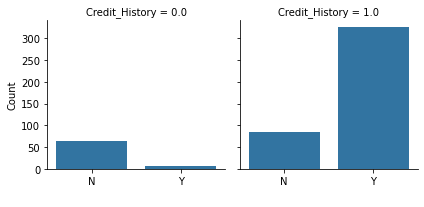

In [110]:
g = sns.FacetGrid(df_loan, col="Credit_History",)
g.map_dataframe(sns.countplot, x="Loan_Status")
g.set_axis_labels(" ", "Count");

In [111]:
df_M_and_G_and_E=df_loan.groupby(by =['Loan_Status','Property_Area'])['Dependents'].count().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','Loan_Status':'Loan_Status','Dependents':'count'})
fig = px.bar(df_M_and_G_and_E, x="Property_Area", y="count", color="Loan_Status", barmode="group",
             
             )
fig.update_layout(title_text='Loan Status With Property Area',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.update_layout(xaxis_title="Property Area",yaxis_title="Count")
fig.show()

In [112]:
df_M_and_G_and_E=df_loan.groupby(by =['Loan_Status','Education'])['Dependents'].count().to_frame().reset_index().rename(columns={'Education':'Education','Loan_Status':'Loan_Status','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Loan_Status", y="count", color="Education", barmode="group",
             
             )
fig.update_layout(title_text='Loan Status With Education ',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.update_layout(xaxis_title="Education",yaxis_title="Count")
fig.show()

In [113]:
fig = px.scatter(df_loan, x='ApplicantIncome', y='LoanAmount',color="Loan_Status")
fig.update_layout(title='Applicant Income Vs Loan Amount With Loan Status ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

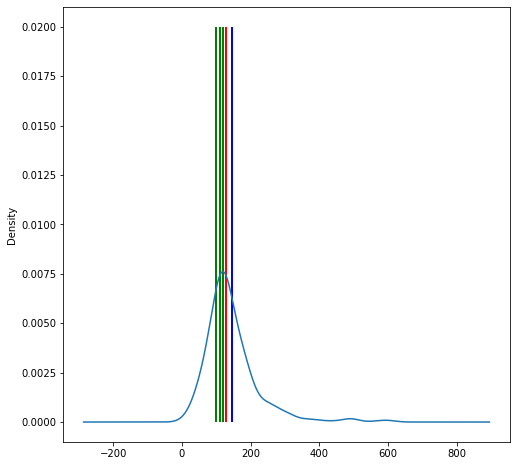

In [114]:
# Checking the difference between the mean and the median in non-symmetric data

norm_data = df_copy_loan["LoanAmount"]
norm_data.plot(kind="density",
              figsize=(8,8))


plt.vlines(norm_data.mean(),    
           ymin=0, 
           ymax=0.02,
           linewidth=2.0,
           color="blue")

plt.vlines(norm_data.median(),   
           ymin=0, 
           ymax=0.02, 
           linewidth=2.0,
           color="red")

plt.vlines(norm_data.mode(),   
           ymin=0, 
           ymax=0.02, 
           linewidth=2.0,
           color="green")


In [115]:
len(df_copy_loan)   #checking the number of records

480

In [116]:
# We’re going to calculate the probability an applicant gets an approval of loan 
# given that their credit history is good.

pd.crosstab(df_copy_loan['Credit_History'], df_copy_loan['Loan_Status'], margins = True)

Loan_Status,0,1,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


#According to the formula,

P(A) = 7 + 325 / (85 + 325 + 63 + 7) = 7.67708333333
P(B) = 85 + 325 / (85 + 325 + 63 + 7) = 85.677083333333
P(A ∩ B) = 325/(85 + 325 + 63 + 7) = 0.6770833333333
P(A|B) = 7.67708333333/85.677083333333  = 0.0896114002236
#The probability of getting a loan approval, given that the credit history is good is 8.9%

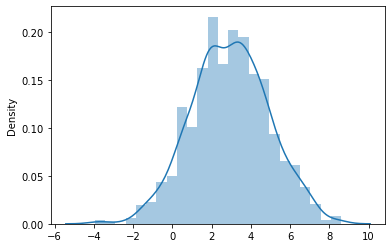

In [117]:
# different distributions in Python


from numpy import random

normaldis = random.normal(loc = 3, scale = 2, size = (1000))


sns.distplot(normaldis, hist = True)
plt.show()

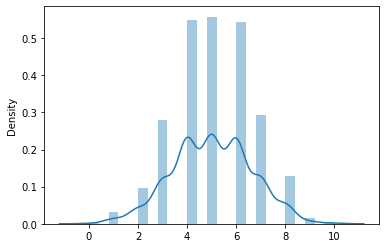

In [118]:
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=True)

plt.show()

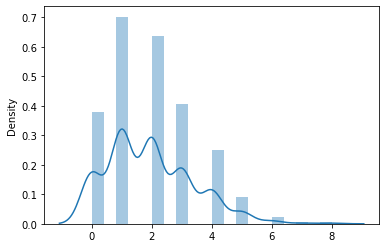

In [119]:
sns.distplot(random.poisson(lam=2, size=1000), kde=True)

plt.show()

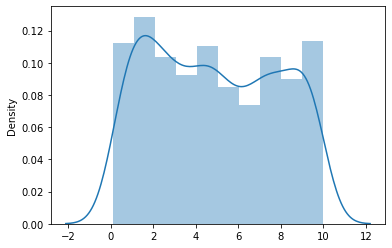

In [120]:
sns.distplot(random.uniform(0.1, 10, size=1000), hist=True)

plt.show()

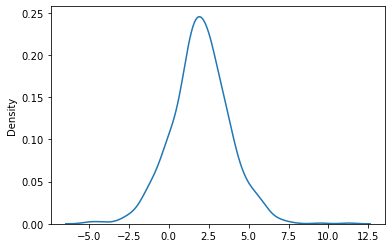

In [121]:
sns.distplot(random.logistic(2, 1, size=1000), hist=False)

plt.show()

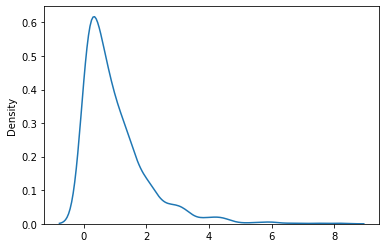

In [122]:
sns.distplot(random.exponential(size=1000), hist=False)

plt.show()

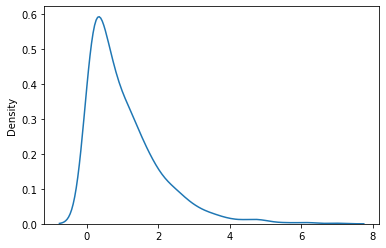

In [123]:
sns.distplot(random.exponential(size=1000), hist=False)

plt.show()

In [124]:
#Data Preprocessing


df_copy_loan=df_loan.copy()

In [125]:
Gender_map= {'Male':0,'Female':1}
Married_map= {'Yes':1,'No':0}
Education_map= {'Graduate':1,'Not Graduate':0}
Self_Employed_map= {'Yes':1,'No':0}
Dependents_map= {'0':0,'1':1,'2':2,'3+':3}
Loan_Status_map= {'Y':1,'N':0}
Rural_map={'Rural':1,'Urban':0,'Semiurban':0}
Urban_map={'Rural':0,'Urban':1,'Semiurban':0}
Semiurban_map={'Rural':0,'Urban':0,'Semiurban':1}

In [126]:
df_copy_loan["Gender"]=df_copy_loan["Gender"].map(Gender_map)
df_copy_loan["Married"]=df_copy_loan["Married"].map(Married_map)
df_copy_loan["Education"]=df_copy_loan["Education"].map(Education_map)
df_copy_loan["Dependents"]=df_copy_loan["Dependents"].map(Dependents_map)
df_copy_loan["Self_Employed"]=df_copy_loan["Self_Employed"].map(Self_Employed_map)
df_copy_loan["Loan_Status"]=df_copy_loan["Loan_Status"].map(Loan_Status_map)
df_copy_loan["Rural_Area"]=df_copy_loan["Property_Area"].map(Rural_map)
df_copy_loan["Urban_Area"]=df_copy_loan["Property_Area"].map(Urban_map)
df_copy_loan["Semiurban_Area"]=df_copy_loan["Property_Area"].map(Semiurban_map)

In [127]:
df_copy_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,1,0,0
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,0,1,0
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,0,1,0


In [128]:
df_copy_loan.drop(['Property_Area'],inplace=True,axis=1)
df_copy_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0
